In [2]:
from tdc.multi_pred import DrugRes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator, Descriptors, AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras import layers, models

## 4. Deep Leaning

### Feature selection

Follow code performs feature selection based on the variance of columns in the dataset. The first step involves selecting only numeric (float) columns from the dataset using the select_dtypes method. This ensures that the data processed is compatible with the subsequent feature selection techniques, as non-numeric data cannot be directly used. This step is particularly important in bioinformatics or drug discovery, where numerical descriptors such as molecular weights or logP values are common. While this approach ensures compatibility, it may also exclude useful non-numeric columns, such as categorical data, which might require encoding.

In [57]:
filtered_GDSC = pd.read_csv('filtered_GDSC_dataset.csv')

In [24]:
dataset_final=filtered_GDSC.select_dtypes(include=float)
dataset_final

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,MaxPartialCharge,...,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,MolLogP,MolMR,Y
0,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,3.968757
1,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,2.692768
2,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,2.478678
3,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,2.034050
4,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,2.966952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170961,12.220360,12.220360,0.024463,-0.169023,0.692307,22.500000,321.380,302.228,321.147727,0.190493,...,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,0.263158,2.4467,92.0593,5.353963
170962,12.220360,12.220360,0.024463,-0.169023,0.692307,22.500000,321.380,302.228,321.147727,0.190493,...,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,0.263158,2.4467,92.0593,4.820567
170963,12.220360,12.220360,0.024463,-0.169023,0.692307,22.500000,321.380,302.228,321.147727,0.190493,...,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,0.263158,2.4467,92.0593,5.785978
170964,12.220360,12.220360,0.024463,-0.169023,0.692307,22.500000,321.380,302.228,321.147727,0.190493,...,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,0.263158,2.4467,92.0593,5.393454


Next, a variance threshold is applied to the dataset. This process uses a VarianceThreshold object with a set threshold of 0.05 to eliminate features with very low variance. Features with minimal variance are unlikely to provide meaningful distinctions between data points and thus add little value to machine learning models. By filtering out these features, the dimensionality of the dataset is reduced, which in turn speeds up model training and enhances interpretability. However, this approach has a downside—features with low variance but biological significance (such as rare biomarkers) might be inadvertently discarded.

In [25]:
selector = VarianceThreshold(threshold=0.05)
selected_dataset = selector.fit_transform(dataset_final)
selected_columns = dataset_final.columns[selector.get_support()]
dataset_filtrado = pd.DataFrame(dataset_final, columns=selected_columns)
#print("Shape do dataset após aplicar o Variance Threshold:", selected_dataset.shape)
#print("Colunas selecionadas:", selected_columns)

In [26]:
dataset_filtrado.to_csv('dataset.csv', index=False)

In [27]:
dataset_filtrado

,MaxAbsEStateIndex,MaxEStateIndex,MinEStateIndex,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,FpDensityMorgan2,FpDensityMorgan3,AvgIpc,...,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,MolLogP,MolMR,Y
0,5.857397,5.857397,0.392174,10.517241,393.443,370.259,393.168856,1.655172,2.344828,2.745576,...,4.096557,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,3.4051,111.9397,3.968757
1,5.857397,5.857397,0.392174,10.517241,393.443,370.259,393.168856,1.655172,2.344828,2.745576,...,4.096557,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,3.4051,111.9397,2.692768
2,5.857397,5.857397,0.392174,10.517241,393.443,370.259,393.168856,1.655172,2.344828,2.745576,...,4.096557,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,3.4051,111.9397,2.478678
3,5.857397,5.857397,0.392174,10.517241,393.443,370.259,393.168856,1.655172,2.344828,2.745576,...,4.096557,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,3.4051,111.9397,2.034050
4,5.857397,5.857397,0.392174,10.517241,393.443,370.259,393.168856,1.655172,2.344828,2.745576,...,4.096557,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,3.4051,111.9397,2.966952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170961,12.220360,12.220360,-0.169023,22.500000,321.380,302.228,321.147727,1.958333,2.666667,3.210046,...,9.756959,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,2.4467,92.0593,5.353963
170962,12.220360,12.220360,-0.169023,22.500000,321.380,302.228,321.147727,1.958333,2.666667,3.210046,...,9.756959,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,2.4467,92.0593,4.820567
170963,12.220360,12.220360,-0.169023,22.500000,321.380,302.228,321.147727,1.958333,2.666667,3.210046,...,9.756959,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,2.4467,92.0593,5.785978
170964,12.220360,12.220360,-0.169023,22.500000,321.380,302.228,321.147727,1.958333,2.666667,3.210046,...,9.756959,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,2.4467,92.0593,5.393454


As we can see, our dataset has gone from 99 columns to 88

### Enconding

Now, we need to prepare the dataset for deep learning by encoding specific features, such as the Tissue and Morgan Fingerprints, to ensure compatibility with algorithms that require numerical input. Initially, the Tissue and Morgan Fingerprints columns are extracted from the dataset to isolate the data that requires transformation. The Tissue column represents the biological origin of the cell lines (e.g., lung, blood), which is crucial for understanding the biological context of drug responses. The Morgan Fingerprints, on the other hand, provide numerical representations of molecular structures, encoding essential structural information used to predict drug activity.

In [28]:
tissue_data = filtered_GDSC['Tissue']
morgan_fingerprints = filtered_GDSC['morgan_fingerprints']

The Morgan Fingerprints are then expanded into a structured numerical format. Each fingerprint, typically stored as a list or array, is unpacked into individual columns (morgan_0, morgan_1, etc.) to ensure compatibility with deep learning models, which require fixed-size numerical input. While this approach captures detailed molecular information, it also increases the dimensionality of the dataset, which may result in higher computational demands. The expansion of fingerprints is biologically significant as it allows algorithms to analyze drugs based on their structural differences or similarities.

In [29]:
morgan_encodings = np.vstack(morgan_fingerprints)
morgan_columns = [f'morgan_{i}' for i in range(morgan_encodings.shape[1])]
morgan_df = pd.DataFrame(morgan_encodings, columns=morgan_columns)

The Tissue column undergoes one-hot encoding, transforming the categorical data into binary format. Each unique tissue type is represented as a separate column, with each row containing a 1 for the corresponding tissue type and 0s elsewhere. This step ensures that categorical information is preserved and converted into a numerical format without introducing any ordinal assumptions. While this process increases the number of columns.

In [30]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
tissue_encodings = one_hot_encoder.fit_transform(tissue_data.values.reshape(-1, 1))
tissue_columns = [f'tissue_{cat}' for cat in one_hot_encoder.categories_[0]]
tissue_df = pd.DataFrame(tissue_encodings, columns=tissue_columns)

After processing the Tissue and Morgan Fingerprints data, they are concatenated with the filtered dataset, creating an augmented dataset that integrates molecular and biological features. This comprehensive dataset is ready for model training and ensures that all relevant data is combined into one unified structure. However, the integration increases the overall size of the dataset, which can require more computational resources. The combined dataset allows the model to leverage both the chemical and biological contexts, enhancing its predictive capabilities and making it more robust for complex tasks such as predicting drug efficacy.

In [31]:
augmented_data = pd.concat([dataset_filtrado, morgan_df, tissue_df], axis=1)

In [32]:
output_path = 'augmented_filtered_dataset.csv'
augmented_data.to_csv(output_path, index=False)

### Dataset Split


Now, its necessary splitting the dataset into training and testing sets and normalizing the features to ensure compatibility with the algorithms. First, the target variable (Y), which represents the outcome or label to predict, is separated from the feature set. The target variable is extracted as target_data, while the rest of the dataset is stored as augmented_data. This separation ensures that the deep learning model can be trained with input features and validated against the target labels without introducing leakage. In the context of bioinformatics, the target often represents biological responses, such as drug efficacy, making its isolation critical for meaningful predictions. The dataset is then split into training and testing sets using the train_test_split function. The training set, comprising 80% of the data, is used to train the model, while the remaining 20% is reserved for testing.

In [35]:
from sklearn.model_selection import train_test_split

target_data = augmented_data['Y'].values  
augmented_data = augmented_data.drop(columns=['Y'])  


print(f"Linhas no dataset augmentado (X): {augmented_data.shape[0]}, Colunas: {augmented_data.shape[1]}")
print(f"Linhas no target_data (Y): {target_data.shape[0]}")


X_train, X_test, y_train, y_test = train_test_split(augmented_data.values, target_data, test_size=0.2, random_state=42)

Linhas no dataset augmentado (X): 170966, Colunas: 2149
Linhas no target_data (Y): 170966


Finally, the features are normalized using the StandardScaler, which standardizes the data by scaling it to have a zero mean and unit variance. The scaler is fitted on the training set and then applied to both the training and testing sets. This ensures that the testing data is scaled consistently with the training data, preventing data leakage. Normalization is essential because many machine learning algorithms are sensitive to the scale of input features, and standardizing them improves model convergence and performance. In biological datasets, where features may include diverse molecular and tissue-related data with varying ranges, normalization ensures that no single feature dominates due to its magnitude, allowing the model to focus on meaningful patterns.

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

### Model Creation

### DNN

its time to defines, compiles, and trains a Deep Neural Network (DNN) for predicting outcomes based on the input dataset. The first part defines the DNN architecture using a function called create_dnn. The model is built sequentially and consists of three layers: the first layer is a dense (fully connected) layer with 128 units and ReLU activation, followed by a dropout layer that randomly drops 30% of the connections during training to reduce overfitting. The second layer is another dense layer with 64 units and ReLU activation, also followed by a dropout layer. The final layer is a single-unit dense layer with linear activation, which is suitable for regression tasks where the goal is to predict continuous values. The model is compiled using the Adam optimizer, which adjusts learning rates dynamically to improve convergence, mean squared error (MSE) as the loss function to minimize, and mean absolute error (MAE) as a performance metric for evaluation. This architecture is particularly designed for regression tasks that involve complex, non-linear relationships, making it well-suited for biological applications, such as predicting drug responses or molecular activities. The dropout layers add robustness by preventing the model from overfitting the training data, while the use of ReLU activation ensures computational efficiency and avoids the vanishing gradient problem common in deeper networks

In [37]:
from tensorflow.keras.models import Sequential


def create_dnn(input_shape):
    model = Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    print("DNN Summary:")
    print(model.summary())
    return model



The create_dnn function is then used to instantiate the model. The model is trained using the fit method, with 20% of the training data reserved for validation to monitor the model's generalization performance. The training is conducted over 50 epochs (iterations over the dataset) with a batch size of 32, meaning the model updates its weights after every 32 samples. The verbose output allows real-time monitoring of the training and validation performance metrics. This training process adjusts the model's parameters (weights and biases) to minimize the error on the training data while ensuring it generalizes well to unseen data through validation monitoring. The combination of layers, dropout, and the Adam optimizer creates a robust and efficient model capable of learning complex patterns in the dataset. However, the model's performance heavily depends on the choice of hyperparameters, such as the number of layers, dropout rates, and learning rates, which need to be carefully tuned. In the context of biological datasets, this DNN architecture can effectively predict outcomes such as drug sensitivity or therapeutic responses by leveraging molecular and tissue-specific features, capturing the underlying biological variability in the data.

In [38]:
input_shape_dnn = (X_train.shape[1],)

dnn_model = create_dnn(input_shape_dnn)

dnn_history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

DNN Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       275,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,521 (1.08 MB)

 Trainable params: 283,521 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3.3892 - mae: 1.3945 - val_loss: 2.0537 - val_mae: 1.0834
Epoch 2/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.2943 - mae: 1.1520 - val_loss: 2.0259 - val_mae: 1.0702
Epoch 3/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.2721 - mae: 1.1484 - val_loss: 2.0362 - val_mae: 1.0828
Epoch 4/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1860 - mae: 1.1227 - val_loss: 1.9273 - val_mae: 1.0480
Epoch 5/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1968 - mae: 1.1238 - val_loss: 2.0799 - val_mae: 1.0834
Epoch 6/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1706 - mae: 1.1144 - val_loss: 1.9476 - val_mae: 1.0633
Epoch 7/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1373 - mae: 1.1056 - val_loss: 1.8937 - val_mae: 1.0367
Epoch 8/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1364 - mae: 1.1049 - val_loss: 2.3989 - val_mae: 1.1549
Epoch 9/50
3420/3420 ━━━━━━━━━━━━━━

This code evaluates the performance of the trained Deep Neural Network (DNN) model on the test dataset and contextualizes the results by analyzing the target variable's distribution. First, the model's performance is assessed using the evaluate function, which calculates the Mean Absolute Error (MAE) on the test set. The MAE quantifies the average absolute difference between the predicted and actual values, providing a straightforward measure of the model's accuracy. In this case, the reported MAE on the test set is 1.1123, indicating the average prediction error. This step is essential to assess how well the model generalizes to unseen data and provides a practical sense of prediction accuracy in the same units as the target variable. The MAE is particularly useful for regression tasks as it is not overly sensitive to outliers, unlike other metrics like Mean Squared Error (MSE).

In [39]:
dnn_eval = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"DNN Mean Absolute Error (MAE) no conjunto de teste: {dnn_eval[1]:.4f}")

DNN Mean Absolute Error (MAE) no conjunto de teste: 1.1123


In [40]:
print(f"Média de Y: {np.mean(target_data):.4f}")
print(f"Desvio padrão de Y: {np.std(target_data):.4f}")
print(f"Valor mínimo de Y: {np.min(target_data):.4f}")
print(f"Valor máximo de Y: {np.max(target_data):.4f}")


Média de Y: 2.0095
Desvio padrão de Y: 2.7165
Valor mínimo de Y: -9.9334
Valor máximo de Y: 12.3591


In summary, the evaluation of the DNN model demonstrates its strong predictive performance, with a low MAE and relative MAE, indicating that the model's errors are small compared to the variability of the target variable. The descriptive statistics provide additional context for interpreting these results, ensuring that the predictions are meaningful in the biological context. This evaluation confirms the utility of the model for applications such as predicting drug responses or other biological outcomes, where accuracy and reliability are critical.

In [41]:
mae_relative = dnn_eval[1] / (np.max(target_data) - np.min(target_data))
print(f"MAE relativo ao intervalo de Y: {mae_relative:.2%}")


MAE relativo ao intervalo de Y: 4.99%


The histogram reveals the shape of the data distribution. In this case, the target variable appears to follow a roughly symmetric distribution centered near zero, with a gradual tapering of frequency toward the extremes. This suggests that the data has a bell-shaped pattern, which could indicate a normal-like distribution, though it would require further statistical tests to confirm. Understanding the distribution of the target variable is critical because it impacts the choice of machine learning models and evaluation metrics. For instance, if the distribution were highly skewed or multimodal, different modeling strategies might be required.

From a biological perspective, this distribution provides insights into the variability of the outcome being studied, such as drug response or a biological measurement. The high frequency of values near the center suggests that most outcomes cluster around a typical value, while the lower frequencies at the extremes indicate rarer, potentially significant biological events.

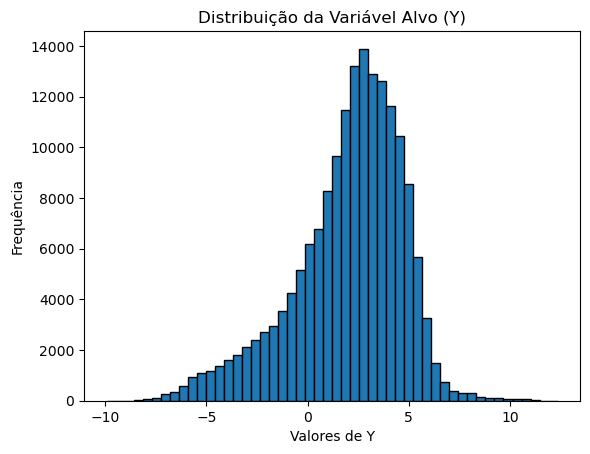

In [42]:
import matplotlib.pyplot as plt
plt.hist(target_data, bins=50, edgecolor='k')
plt.title("Distribuição da Variável Alvo (Y)")
plt.xlabel("Valores de Y")
plt.ylabel("Frequência")
plt.show()


### CNN

The create_cnn function defines the CNN architecture. It begins by reshaping the input data to a format suitable for convolutional operations, treating the features as a 1D sequence. The model includes two 1D convolutional layers with 32 and 64 filters, respectively, each using a kernel size of 3 and ReLU activation. These layers extract local patterns from the input data, such as dependencies or correlations between features. Each convolutional layer is followed by a MaxPooling layer, which downsamples the data to reduce its dimensionality while retaining the most significant features, thereby improving computational efficiency.

After the convolutional layers, the data is flattened into a single vector to prepare it for the fully connected layers. A dense layer with 64 neurons and ReLU activation is included to learn high-level feature representations. A dropout layer with a 30% dropout rate follows, helping to reduce overfitting by randomly deactivating neurons during training. The final layer is a dense output layer with one neuron and a linear activation function, which is appropriate for regression tasks where the output is a continuous variable. The model is compiled using the Adam optimizer, which dynamically adjusts learning rates for faster convergence, the mean squared error (MSE) as the loss function, and the mean absolute error (MAE) as a performance metric for evaluation.

In [43]:
def create_cnn(input_shape):
    model = Sequential([
        layers.Reshape((input_shape[0], 1), input_shape=input_shape),
        layers.Conv1D(32, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    print("CNN Summary:")
    print(model.summary())
    return model



The create_cnn function is called to instantiate the model, and the model is trained using the fit method. During training, 20% of the data is reserved for validation, allowing the model's generalization performance to be monitored. The training runs for 50 epochs, with a batch size of 32, enabling frequent weight updates and faster convergence. The training process adjusts the model's parameters, including filters, weights, and biases, to minimize the error on the training data while maintaining good performance on the validation set.

This CNN architecture is particularly advantageous because it leverages convolutional layers to extract hierarchical patterns, making it ideal for datasets with complex dependencies. The pooling layers and dropout further enhance its generalization by reducing overfitting and computational complexity. However, training CNNs can be computationally intensive, and the choice of hyperparameters, such as the number of filters, kernel size, and dropout rate, significantly impacts performance. From a biological perspective, this CNN model is well-suited for analyzing molecular descriptors or gene expression data, as it can capture local dependencies and intricate relationships between features. This makes it highly effective for tasks like predicting drug efficacy or modeling biological responses, where understanding subtle patterns in the data is crucial for generating meaningful predictions.

In [44]:
input_shape_cnn = (X_train.shape[1],)
cnn_model = create_cnn(input_shape_cnn)
cnn_history = cnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

CNN Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 2149, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 2147, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1073, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1071, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 535, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     2,191,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,197,825 (8.38 MB)

 Trainable params: 2,197,825 (8.38 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 87s 25ms/step - loss: 3.1092 - mae: 1.3336 - val_loss: 2.0390 - val_mae: 1.0882
Epoch 2/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 89s 26ms/step - loss: 2.3825 - mae: 1.1748 - val_loss: 1.9383 - val_mae: 1.0478
Epoch 3/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 90s 26ms/step - loss: 2.2509 - mae: 1.1420 - val_loss: 1.9782 - val_mae: 1.0691
Epoch 4/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 89s 26ms/step - loss: 2.2310 - mae: 1.1340 - val_loss: 1.9144 - val_mae: 1.0421
Epoch 5/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 90s 26ms/step - loss: 2.2030 - mae: 1.1290 - val_loss: 1.8880 - val_mae: 1.0351
Epoch 6/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 91s 27ms/step - loss: 2.1642 - mae: 1.1169 - val_loss: 1.9263 - val_mae: 1.0453
Epoch 7/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 92s 27ms/step - loss: 2.1666 - mae: 1.1155 - val_loss: 1.8969 - val_mae: 1.0408
Epoch 8/50
3420/3420 ━━━━━━━━━━━━━━━━━━━━ 92s 27ms/step - loss: 2.1455 - mae: 1.1128 - val_loss: 1.8829 - val_mae: 1.0366
Epoch 9/50
3420/342

In [45]:
cnn_eval = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Mean Absolute Error (MAE) no conjunto de teste: {cnn_eval[1]:.4f}")

CNN Mean Absolute Error (MAE) no conjunto de teste: 1.0122


The CNN model evaluation shows that it achieves a low MAE of 1.0122 on the test set, demonstrating strong predictive performance. The descriptive statistics of the target variable indicate a mean of approximately 2.0095, with a standard deviation of 2.7165, and a range spanning from -9.9334 to 12.3591. The relative MAE of 4.54% confirms that the prediction error is small compared to the variability in the target variable. These results suggest that the model effectively captures the underlying patterns in the data and provides reliable predictions, making it suitable for biological applications such as modeling drug efficacy or predicting cellular responses.

In [47]:
mae_relative = cnn_eval[1] / (np.max(target_data) - np.min(target_data))
print(f"MAE relativo ao intervalo de Y: {mae_relative:.2%}")


MAE relativo ao intervalo de Y: 4.54%


In [49]:
# 6. Salvar os modelos treinados
dnn_model.save('trained_dnn_model.h5')
print("Modelo DNN salvo como 'trained_dnn_model.h5'.")

cnn_model.save('trained_cnn_model.h5')
print("Modelo CNN salvo como 'trained_cnn_model.h5'.")

Modelo DNN salvo como 'trained_dnn_model.h5'.
Modelo CNN salvo como 'trained_cnn_model.h5'.
